In [205]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
# The path to our CSV file
#(name the file we are going to read as "file_gdp")
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas 
#rename it as a dataframe(df) for ease of readibiity
su_vs_gdp_o_df = pd.read_csv(file_gdp)

# Display all columns 
#su_vs_gdp_o_df.columns



In [209]:
# Display information of the df
#su_vs_gdp_o_df.info()

In [210]:
# Group using 'country-year' column and using the aggregate command to define/combine data to respective column.
# for ease of readibility(also we are ommitting columns we do not need)
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita ($)':'first'}).reset_index()



## Info for "GDP 2005"

In [212]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2005 are in a DataFrame and save as new dataframe(df)
gdp_2005_df = sort_gdp_df.query("year == '2005'")



# Us_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='United States']
# Japan_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Japan']
# Germany_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Germany']
# United_Kingdom_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='United Kingdom']
# Italy_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Italy']
# Brazil_2005 = gdp_2005_df.loc[gdp_2005_df['country']=='Brazil']

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2005_df = gdp_2005_df
gdp_2005_df.head(6)

# Create an array that contains the number of users each language has
country2005= gdp_2005_df.head(6)['country']
suicides2005=gdp_2005_df.head(6)['suicides/100k pop']
gdp_2005_df_top_6= gdp_2005_df.head(6)

gdp_2005_df_top_6



,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita ($)
2260,United States2005,United States,2005,32629,276106680,146.68,13100000000000,"$47,423.00"
1135,Japan2005,Japan,2005,30369,120657507,266.89,4760000000000,"$39,412.00"
825,Germany2005,Germany,2005,10270,78851254,161.49,2860000000000,"$36,289.00"
2229,United Kingdom2005,United Kingdom,2005,4047,56809024,79.16,2520000000000,"$44,372.00"
778,France2005,France,2005,10713,57160687,232.09,2200000000000,"$38,420.00"
1087,Italy2005,Italy,2005,3742,55244690,82.59,1850000000000,"$33,536.00"


##  Info  for "GDP for 2015"

In [214]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(6)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_6 = gdp_2015_df.head(6)
gdp_2015_df_top_6

ind=('United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy')


# Create an array that contains the number of users each language has
country2015= gdp_2015_df_top_6['country'].tolist()
suicides2015=gdp_2015_df_top_6['suicides/100k pop'].tolist()
country2005= gdp_2005_df_top_6['country'].tolist()
suicides2005=gdp_2005_df_top_6['suicides/100k pop'].tolist()


## PIE CHART Top GDP for 2015

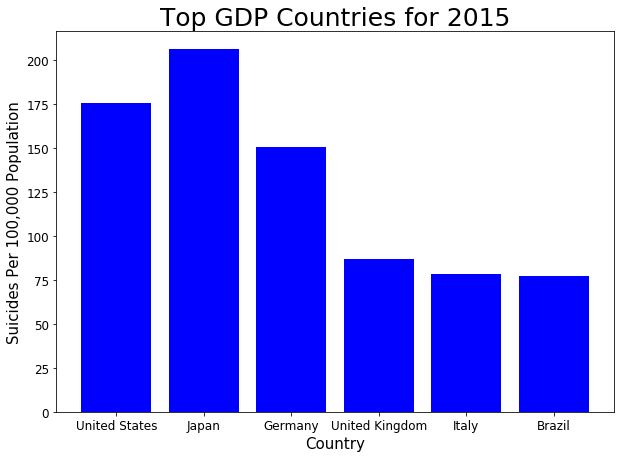

In [215]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(6)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_6 = gdp_2015_df.head(6)
gdp_2015_df_top_6


# Create an array that contains the number of users each language has
country1= gdp_2015_df_top_6['country']
suicides1=gdp_2015_df_top_6['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(10,7))
plt.bar(country1, suicides1, color="blue", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top GDP Countries for 2015",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
plt.rcParams['font.size'] = 12.0

plt.savefig('top_gdp.png')


## GDP 2015 vs 2005

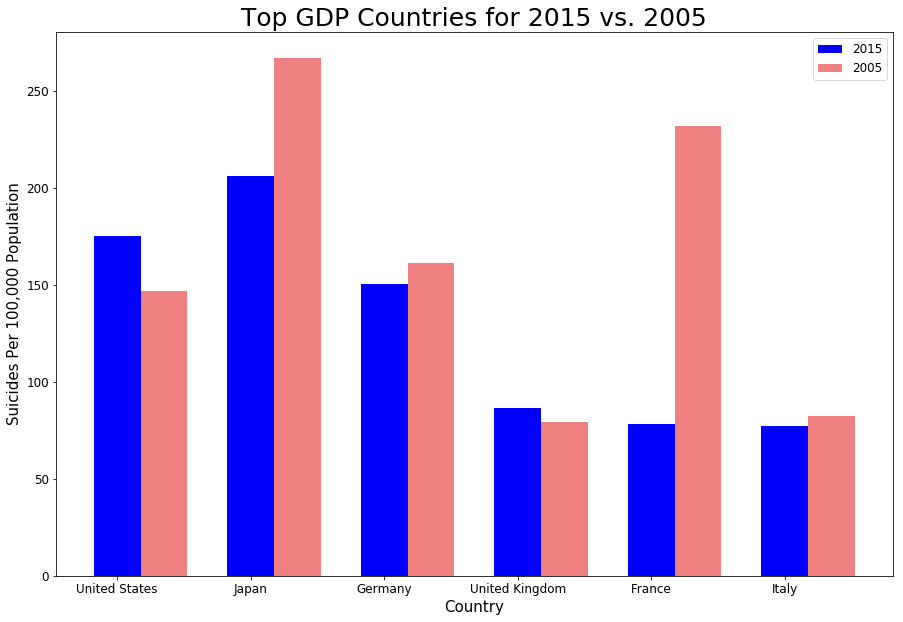

In [220]:
# Create List
N = 6
suicides_2015 = (suicides2015)
suicides_2005 = (suicides2005)



plt.figure(figsize=(15,10))
# # # Give the chart a title,suicides2005 x label, and y label
plt.title("Top GDP Countries for 2015 vs. 2005",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
# plt.rcParams['font.size'] = 12.0
plt.xticks(range(6),['United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy'])  

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, suicides_2015, width, color='blue', label='2015')
plt.bar(ind + width, suicides_2005, width, color='lightcoral',
    label='2005')


plt.legend(loc='best')
plt.show()

In [221]:
# # It is possible to sort based upon multiple columns
# # here we are sorting by highest gdp
# sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# # Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
# gdp_2015_df = sort_gdp_df.query("year == '2015'")
# gdp_2015_df.head(6)

# #Create new dataframe(df) to hold top x countries with highest year_gdp
# gdp_2015_df_top_6 = gdp_2015_df.head(6)
# gdp_2015_df_top_6

# ind=('United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy')


# # Create an array that contains the number of users each language has
# country2015= gdp_2015_df_top_6['country'].tolist()
# suicides2015=gdp_2015_df_top_6['suicides/100k pop'].tolist()
# country2005= gdp_2005_df_top_6['country'].tolist()
# suicides2005=gdp_2005_df_top_6['suicides/100k pop'].tolist()
# display(suicides2005)
# display(country2005)

## SUICIDE ANALYSIS

In [226]:
# gdp data for 2005
suicide_data_2005 = gdp_2005_df_top_6[['country','suicides/100k pop']]
display(suicide_data_2005)

# gdp data for 2015
suicide_data_2015 = gdp_2015_df_top_6[['country','suicides/100k pop']]
suicide_data_2015

,country,suicides/100k pop
2260,United States,146.68
1135,Japan,266.89
825,Germany,161.49
2229,United Kingdom,79.16
778,France,232.09
1087,Italy,82.59


,country,suicides/100k pop
2270,United States,175.41
1145,Japan,206.04
835,Germany,150.34
2239,United Kingdom,86.74
1097,Italy,78.45
378,Brazil,77.45


In [223]:
## Infor for "2005 Suicides"

In [224]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
#sort_sui_df = su_vs_gdp_df.sort_values(["suicides/100k pop"], ascending=False)

# Filter the data so that only those in 2005 are in a DataFrame and save as new dataframe(df)
sui_2005_df = sort_sui_df.query("year == '2005'")



# Us_2005 = sui_2005_df.loc[sui_2005_df['country']=='United States']
# Korea_2005 = sui_2005_df.loc[sui_2005_df['country']=='Republic of Korea']
# Lithuania_2005 = sui_2005_df.loc[sui_2005_df['country']=='Lithuania']
# Uruguay_2005 = sui_2005_df.loc[sui_2005_df['country']=='Uruguay']
# Slovenia_2005 = sui_2005_df.loc[sui_2005_df['country']=='Slovenia']
# Hungary_2005 = sui_2005_df.loc[sui_2005_df['country']=='Hungary']

#Create new dataframe(df) to hold top x countries with highest year_gdp
sui_2005_df = sui_2005_df


# Create an array that contains the number of users each language has
country_2005= sui_2005_df.head(5)['country']
suicides_2005=sui_2005_df.head(5)['suicides/100k pop']
sui_2005_df_top= sui_2005_df[sui_2005_df['country'].isin(['United States','Republic of Korea','Lithuania','Uruguay','Slovenia','Hungary'])]

sui_2005_df_top[['country','suicides/100k pop']]

,country,suicides/100k pop
1265,Lithuania,485.79
1708,Republic of Korea,479.04
962,Hungary,352.01
1932,Slovenia,337.41
2289,Uruguay,241.31
2260,United States,146.68


##  Info  for "Suicides 2015"

Text(0, 0.5, 'GDP')

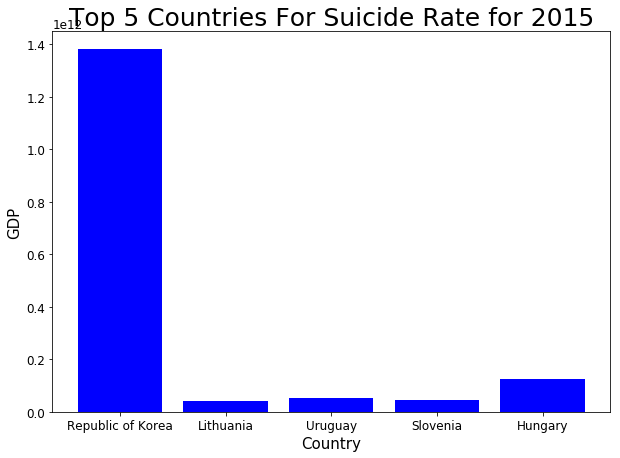

In [241]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest suicide rate
sort_suicide_df = su_vs_gdp_df.sort_values(
    ["suicides/100k pop"], ascending=False)
sort_suicide_df.head()

# Filter so that only those in 2015 are in a DataFrame and save as new dataframe(df)
suicide_2015_df = sort_suicide_df.query("year == '2015'")
suicide_2015_df.head()

# Create an array that contains the number of users each language has
country2 = suicide_2015_df.head()['country']
gdp2 = suicide_2015_df.head()['year_gdp']

# Tell matplotlib we want to establish a bar graph and indicate its size
plt.figure(figsize=(10,7))
plt.bar(country2, gdp2, color="blue", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top 5 Countries with Highest Suicide Rate for 2015", fontsize=25)
plt.xlabel("Country", fontsize=15)
plt.ylabel("GDP", fontsize=15)

# Save image
#plt.savefig('top_suicide.png')


## Suicides 2015 vs 2005

In [242]:
#master list used for filtering
country_list = ['United States','Republic of Korea','Lithuania','Uruguay','Slovenia','Hungary']

# raw data for 2005 & 2015
data_2015 = gdp_2015_df
data_2005 = gdp_2005_df

# filtered 2005 data
filtered_2005 = data_2005[data_2005['country'].isin(year_2005_country_list)]
#display(filtered_2005)

# filtered 2015 data
filtered_2015 = data_2015[data_2015['country'].isin(year_2005_country_list)]
#display(filtered_2015)

# create a mapping function to sort the data
mapping = {country: i for i, country in enumerate(country_list)}

key = filtered_2005['country'].map(mapping)
sorted_2005 = filtered_2005.iloc[key.argsort()]

# create a mapping function to sort the data
key = filtered_2015['country'].map(mapping)
sorted_2015 = filtered_2015.iloc[key.argsort()]

display(sorted_2005)
display(sorted_2015)


,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita ($)
2260,United States2005,United States,2005,32629,276106680,146.68,13100000000000,"$47,423.00"
1708,Republic of Korea2005,Republic of Korea,2005,12011,46151884,479.04,898000000000,"$19,460.00"
1265,Lithuania2005,Lithuania,2005,1319,3174728,485.79,26100000000,"$8,229.00"
2289,Uruguay2005,Uruguay,2005,498,3070178,241.31,17400000000,"$5,655.00"
1932,Slovenia2005,Slovenia,2005,503,1911817,337.41,36300000000,"$19,012.00"
962,Hungary2005,Hungary,2005,2619,9608943,352.01,113000000000,"$11,764.00"


,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita ($)
2270,United States2015,United States,2015,44189,300078511,175.41,18100000000000,"$60,387.00"
1718,Republic of Korea2015,Republic of Korea,2015,13510,48671752,389.14,1380000000000,"$28,410.00"
1275,Lithuania2015,Lithuania,2015,896,2753926,385.48,41500000000,"$15,073.00"
2298,Uruguay2015,Uruguay,2015,630,3190795,270.02,53300000000,"$16,696.00"
1942,Slovenia2015,Slovenia,2015,422,1954632,264.81,43100000000,"$22,036.00"
972,Hungary2015,Hungary,2015,1868,9389519,257.27,123000000000,"$13,087.00"


In [244]:
# Create List
N = 6
sui_2015 = (sorted_2015)
sui_2005 = (ssorted_2015)



plt.figure(figsize=(15,10))
# # # Give the chart a title,suicides2005 x label, and y label
plt.title("Top Suicied Countries for 2015 vs. 2005",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
# plt.rcParams['font.size'] = 12.0
plt.xticks(range(6),['United States', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy'])  

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, suicides_2015, width, color='blue', label='2015')
plt.bar(ind + width, suicides_2005, width, color='lightcoral',
    label='2005')


plt.legend(loc='best')
plt.show()

SyntaxError: invalid syntax (<ipython-input-244-34ed270d80de>, line 8)